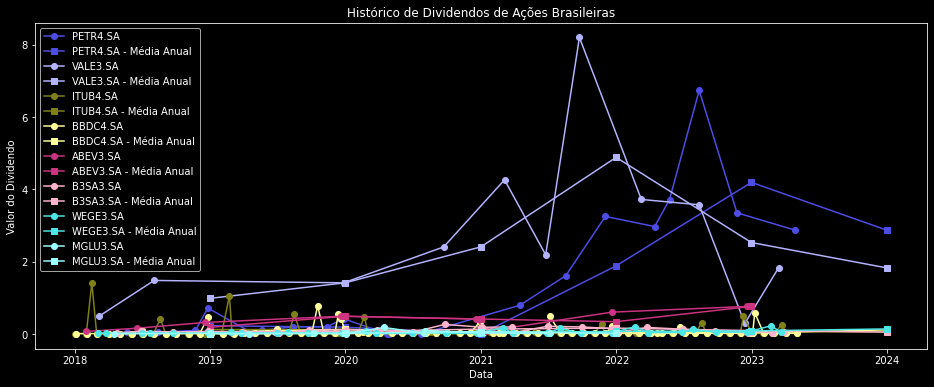

In [2]:
import pytz
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.dates import YearLocator, DateFormatter

# Define o ticker da ação que deseja obter o histórico de dividendos
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "ABEV3.SA", "B3SA3.SA", "WEGE3.SA", "MGLU3.SA"]

# periodo de tempo
periodo = 5

# Define a data de início e fim do período desejado (5 anos a partir de hoje)
start_date = datetime.today() - timedelta(days=periodo*365)
start_date = start_date.replace(month=1, day=1)
end_date = datetime.today()


# Make start_date and end_date timezone-aware
start_date = start_date.replace(tzinfo=pytz.UTC)
end_date = end_date.replace(tzinfo=pytz.UTC)

# Obtém o histórico de dividendos da ação usando a biblioteca Yahoo Finance API
dividend_history = {}
for ticker in tickers:
    data = yf.Ticker(ticker).dividends.loc[start_date:end_date]
    if data.empty:
        print(f"Got error from yahoo api for ticker {ticker}, Error: {data}")
    else:
        dividend_history[ticker] = data.dropna()

# Calcula a média anual dos dividendos para cada ação
annual_means = {}
for ticker in dividend_history:
    annual_means[ticker] = dividend_history[ticker].resample('A').mean()



# Define as cores a serem usadas no gráfico
colors = mcolors.LinearSegmentedColormap.from_list(
    'mycolors', 
    [(0.3, 0.3, 0.9), (0.7, 0.7, 1), (0.5, 0.5, 0.1), (1, 1, 0.6), (0.8, 0.2, 0.5), (1, 0.7, 0.8), (0.3, 0.9, 0.9), (0.6, 1, 1)], 
    N=len(tickers)
)

# Cria um objeto de figura e eixo com duas vezes a largura
fig, ax = plt.subplots(figsize=(16, 6))

# Plota o histórico de dividendos e a média anual, mostrando os pontos de valores existentes
for i, ticker in enumerate(dividend_history):
    ax.plot(
        dividend_history[ticker].index, 
        dividend_history[ticker], 
        label=ticker, 
        marker='o', 
        color=colors(i)
    )
    ax.plot(
        annual_means[ticker].index, 
        annual_means[ticker], 
        label=f"{ticker} - Média Anual", 
        marker='s', 
        color=colors(i)
    )

# Define os títulos e rótulos do gráfico
ax.set_title("Histórico de Dividendos de Ações Brasileiras")
ax.set_xlabel("Data")
ax.set_ylabel("Valor do Dividendo")

# Configura o eixo x para exibir rótulos de anos
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Adiciona a legenda ao gráfico
ax.legend()

#Exibe o gráfico na tela
plt.show()
